# Linear Regression
Regression problems occur in situations where input features $x\in\mathbb{X}$ and outputs $y\in\mathbb{Y}$ are presented in a dataset $\mathcal{D}=\{(x_1,y_1)\dots(x_N,y_N)\}$. You have reason to believe that there exists some possibly quite complicated function $f:\mathbb{X}\rightarrow\mathbb{Y}$. Such a function will always exist for any given $\mathcal{D}$ because the most simple thing you could do is force $y_n=f(x_n)$ for all $N$ data pairs $(x_n,y_n)$

###  Spikey Spaghetti Model

For example lets generate $N=100$ normally distributed vectors from $x\sim\mathcal{N}_X(0,\mathbb{I})$ and outputs $y\sim\mathcal{N}_Y(0,\mathbb{I})$. Here the subscripts tell us the dimensionality of each vector and $\mathbb{I}$ is the unit covariance matrix and $0$ is implicitly understood as a vector of zero means. We can construct a the function that returns the $y_n$ for which the norm $|x-x_n|$ is minimal

$$f(x)=\mathrm{argmin}_{x_n,y_n\in\mathcal{D}}|x-x_n|$$

Mean Square Error 102.0671623275873%


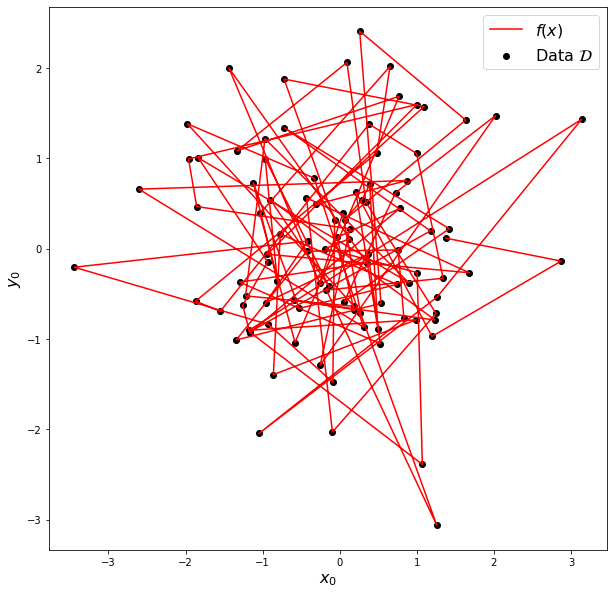

In [19]:
from matplotlib.pyplot import figure,scatter,plot,xlabel,ylabel,legend
from numpy import vectorize,array,argmin,mean
from numpy.random import normal
from numpy.linalg import norm

nData = 100
Xdim,Ydim = 1,1

############################################################# generate data
X = normal(size=(Xdim,nData))
Y = normal(size=(Ydim,nData))
dataset = list(zip(X.T,Y.T))

############################################################# define function
def f(x) :
    norms = norm(X.T-x,axis=1)
    return Y.T[ argmin(norms) ]

error = mean([ norm(f(x)-y)**2 + norm(f(x))**2 for x,y in dataset])
print(f"Mean Square Error {100*error}%")

#############################################################
#############################################################
############################################################# plot results

xidx,yidx = 0,0
figure(figsize=(10,10))

plot(X[xidx],[f(x)[yidx] for x in X.T], label='$f(x)$', color='r')
scatter(X[xidx],Y[yidx], label='Data $\mathcal{D}$', color='k')

xlabel(r'$x_{}$'.format(xidx),fontsize=16)
ylabel(r'$y_{}$'.format(yidx),fontsize=16)
legend(fontsize=16);

In general the features $x\in\mathbb{X}$ and outputs $y\in\mathbb{Y}$ do not have to be vectors. They could be anything from documents to representations of faces to properties of pharmacuticals. You only need to define a scalar function that meausres the similarity between intputs $|x-x'|$. For two documents $x$ and $x'$ this could be a the size of the set difference of vocabularies.

So we found a function with zero mean squared error $\frac{1}{N}\sum_{x,y\in\mathcal{D}}|y-f(x)|$ that works for any dataset for any feature and output types as long as a notion of distance is defined. The question we need to ask ourselves is: how useful is this? Have we suddenly solved all regression problems?

If we look closely we can see that all we've done is drawn a spikey spaghetti line connecting all points in no reasonable order. For any single input vector $x$ there are multiple possible output vectors $y$ and the number of possible outputs becomes very dense at the centre of the data cloud. This means that $f(x)$ has no predictive power at all.

###  Multivariate Polynomial Model

Ideally we would only get one vector output $y$ for one feature vector input $x$. [The interpolation theorem](https://en.wikipedia.org/wiki/Polynomial_interpolation#Interpolation_theorem) states that it is still possible to draw such a line through all points a using polynomial of sufficiently high degree. Here it becomes convenient to write our input data as matrices $\mathbf{X}=(x_1\dots x_N)$ and $\mathbf{Y}=(y_1\dots y_N)$ where different data row vectors $x_n,y_n$ lie along different columns. Our model is now a multivariate polynomial with unknown weights $\theta$

$$
f(x)=\sum_{n\subset\mathbb{N}}\theta_n\phi_n(x)
\quad\mathrm{where}
\quad\phi_n(x):=\prod_{i=1}^{\mathrm{dim}[x]} x[i]^{n[i]}
$$

The basis function $\phi_n(x)$ is the product of powers of the elements $x[i]$. Here $n$ must have the same dimension as $x$. We can write the expression as

In [16]:
############################################################# define function
from itertools import product
def f(x,θ,degree=3) :
    degrees = len(x)*(range(degree),)
    
    return sum([ enumerateproduct(*degrees) ])
#     norms = norm(input_features-x,axis=1)
#     return [sum(norms)]

f([0,1],)

# def phi(x,n) :
#     return prod(x**n)

# error = mean([ norm(f(x)-y)**2 for x,y in dataset])
# print("Mean Square Error {}%".format(100*error))

# #############################################################
# #############################################################
# ############################################################# plot results

# xidx,yidx = 0,0
# figure(figsize=(10,10))

# plot(input_features[:,xidx],[f(x)[yidx] for x in input_features], label='$f(x)$', color='r')
# scatter(input_features[:,xidx],outputs[:,yidx], label='Data $\mathcal{D}$', color='k')

# xlabel(r'$x_{}$'.format(xidx),fontsize=16)
# ylabel(r'$y_{}$'.format(yidx),fontsize=16)
# legend(fontsize=16);

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

[]

(range(0, 3), range(0, 3), range(0, 3))

In [1]:
import sklearn.linear_model as linear_model
from matplotlib.pyplot import *
from xarray import open_dataset

In [8]:
from pandas import *
from matplotlib.pyplot import *

In [6]:
x = read_csv('data/global-temperatures.tsv',sep='\t')
x

Age My  Age ky before 2015  δ18O   Tdo     Ts  T anomaly
0       0.0016                 1.7  3.16  1.00  14.24       0.24
1       0.0024                 2.5  2.91  1.06  14.37       0.37
2       0.0032                 3.3  3.33  1.06  14.37       0.37
3       0.0040                 4.1  3.16  0.89  14.02       0.02
4       0.0048                 4.9  3.58  0.79  13.83      -0.17
...        ...                 ...   ...   ...    ...        ...
17599  65.2216             65221.7  0.35  9.06  24.21      10.21
17600  65.2652             65265.3  0.50  9.08  24.23      10.23
17601  65.3463             65346.4  0.81  9.27  24.42      10.42
17602  65.4197             65419.8  1.00  8.90  24.05      10.05
17603  65.5228             65522.9  0.75  8.14  23.29       9.29

[17604 rows x 6 columns]

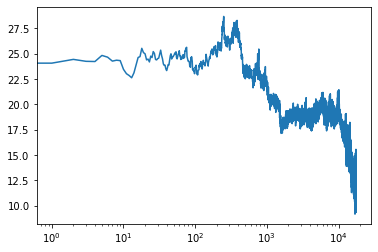

In [21]:
plot(x.Ts.values[::-1])
xscale('log')

array([14.24, 14.37, 14.37, ..., 24.42, 24.05, 23.29])

In [2]:
downsample = 10000
climate_data = open_dataset('data/climate-data.nc')\
.to_dataframe()[::downsample].reset_index(level=[0,1], drop=True)

climate_data.sort_index(inplace=True)
climate_data

longitude   latitude  land_mask  temperature  climatology
time                                                                  
1750.041667 -83.571426  82.788071   0.310081          NaN   -33.603367
1750.041667  13.150685 -12.051556   0.202500          NaN    20.707054
1750.041667  42.786884  57.052761   0.955000     1.593049    11.611300
1750.041667 -57.810219 -52.237446   0.130000          NaN     8.356696
1750.041667 -13.783784   8.839602   0.150000          NaN    27.562996
...                ...        ...        ...          ...          ...
2020.708333 -51.545456 -10.446893   1.000000     2.891641    26.403969
2020.708333  -5.727273  10.446893   1.000000     0.461901    26.342127
2020.708333 -60.346821 -39.383591   0.218000     0.670020    13.123789
2020.708333  89.230766  58.663330   1.000000     1.604640     7.768713
2020.708333  42.727272  28.132877   1.000000     2.563370    27.966627

[21436 rows x 5 columns]

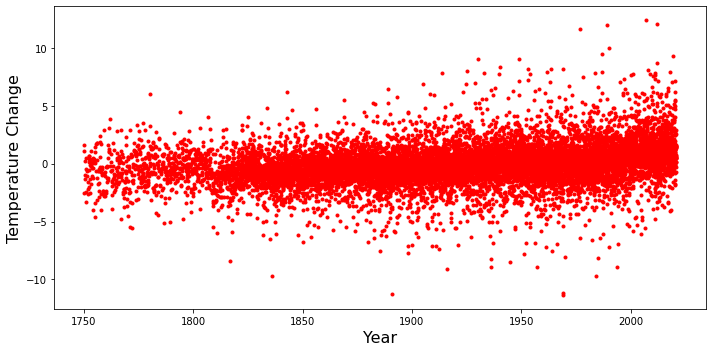

In [3]:
figure(figsize=(10,5))
climate_data.temperature.plot(color='r',marker='.',linewidth=0)

xlabel('Year',fontsize=16)
ylabel('Temperature Change',fontsize=16)
tight_layout()

In [4]:
nanmask = ~climate_data.temperature.isna()
X = climate_data[nanmask].index.to_numpy().reshape(-1,1)
y = climate_data[nanmask].temperature.to_numpy()

In [5]:
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X,y)

LinearRegression(n_jobs=-1)

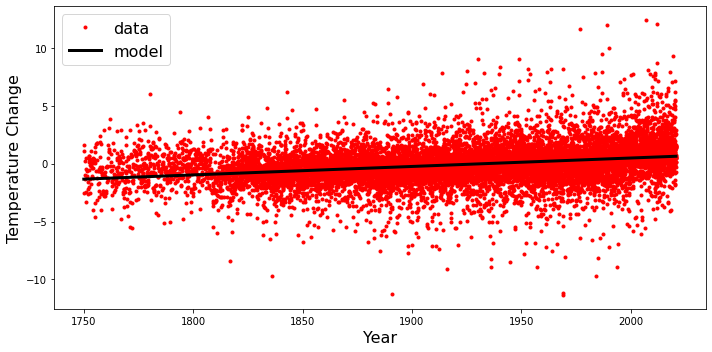

In [6]:
figure(figsize=(10,5))

climate_data.temperature.plot(color='r',marker='.',linewidth=0, label='data')
plot(X.flatten(),model.predict(X),label='model',linewidth=3,color='k')

xlabel('Year',fontsize=16)
ylabel('Temperature Change',fontsize=16)

legend(fontsize=16)
tight_layout()